In [1]:
import os
from skimage import io as sk_io
from matplotlib import pyplot as plt
%matplotlib inline

## Leitura das imagens

A escolha da imagem mestre foi baseada por ser a imagem mais antiga da base de dados fornecida.

In [2]:
img_path = './IMG_RAFAEL_VISIONA 2019_10/00_Todas_JPEG/'

#Sensor WV01
img_master = sk_io.imread(os.path.join(img_path, "WV01_2009_JPEG_R1C1.jpg"))
img_wv01_2019 = sk_io.imread(os.path.join(img_path,"WV01_2019_JPEG_R1C1.jpg"))

#Sensor WV02
img_wv02_2017 = sk_io.imread(os.path.join(img_path,"WV02_2017_JPEG_R1C1.jpg"))
img_wv02_2018 = sk_io.imread(os.path.join(img_path,"WV02_2018_JPEG_R1C1.jpg"))
img_wv02_2019 = sk_io.imread(os.path.join(img_path,"WV02_2019_JPEG_R1C1.jpg"))

#Sensor WV03
img_wv03_2019 = sk_io.imread(os.path.join(img_path,"WV03_2019_JPEG_R1C1.jpg"))
img_wv03_2018a = sk_io.imread(os.path.join(img_path,"WV03_ABR_2018_JPEG_R1C1.jpg"))
img_wv03_2018j = sk_io.imread(os.path.join(img_path,"WV03_JUL_2018_JPEG_R1C1.jpg"))

#Sensor GE01
img_ge01_2011 = sk_io.imread(os.path.join(img_path,"GE01_2011_JPEG_R1C1.jpg"))
img_ge01_2013 = sk_io.imread(os.path.join(img_path,"GE01_2013_JPEG_R1C1.jpg"))
img_ge01_2017 = sk_io.imread(os.path.join(img_path,"GE01_2017_JPEG_R1C1.jpg"))


In [3]:
def plotComparison(img_master, img_slave):
    fig = plt.figure(figsize=(20, 20))
    
    #Subplot for master image
    a = fig.add_subplot(2,1,1)
    plt.imshow(img_master, cmap= 'gray')
    plt.title(f'Master {img_master.shape}')

    #Subplot for slave image
    a = fig.add_subplot(2,1,2)
    plt.imshow(img_slave, cmap= 'gray')
    plt.title(f'Slave {img_slave.shape}')

    plt.show()

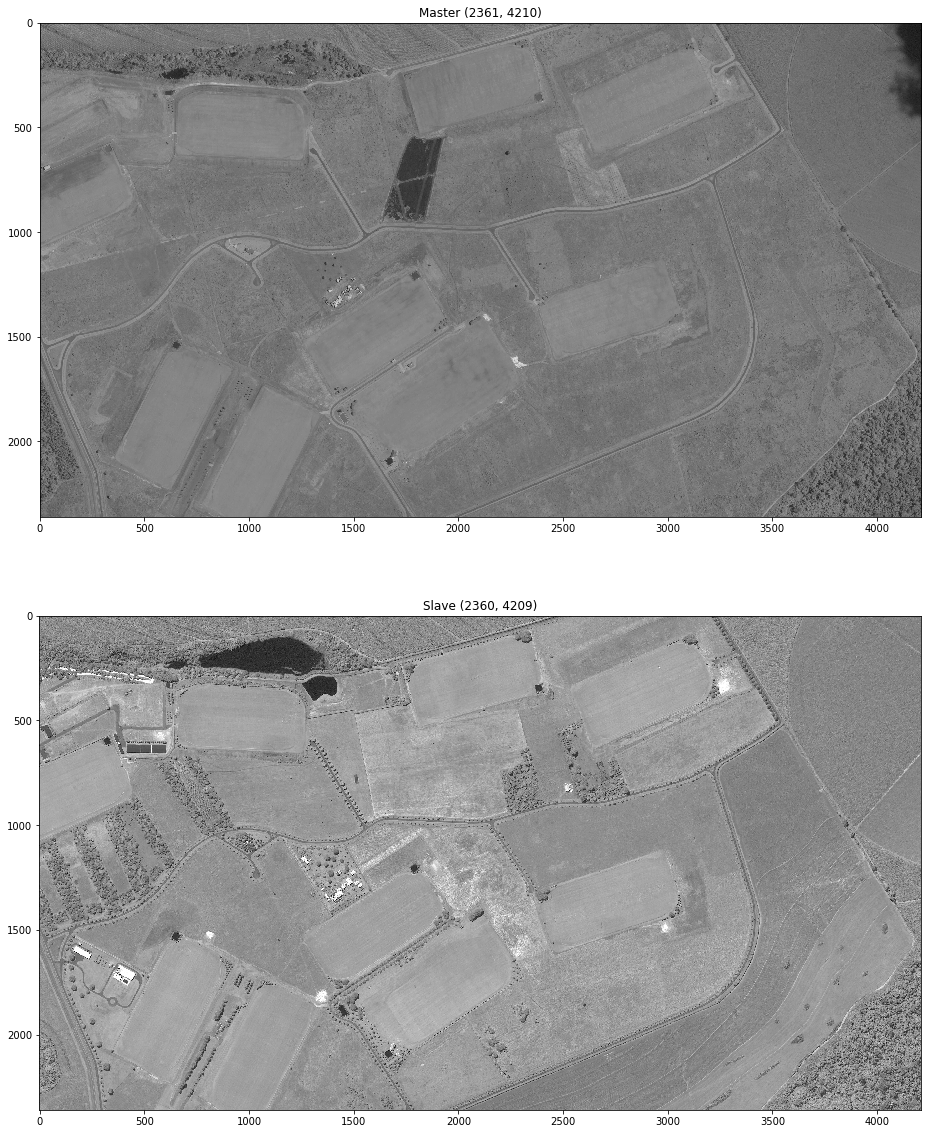

In [4]:
#Plotting images from sensor WV01
plotComparison(img_master, img_wv01_2019)

Ao comparar as duas imagens, percebe-se alguns pontos que precisaram de tratamento antes de identificar as diferenças entre elas:

1. Presença de uma nuvem no canto superior da imagem mestre 
2. Diferenças na intensidade de cinza entre as imagens
3. Diferença nas dimensões das imagens 

In [5]:
def cloudRemoval(image):
    pass

In [6]:
#Reamostragem da imagem para as dimensões da imagem mestra
from skimage.transform import resize

def resizeImage(image):
    return resize(image, (img_master.shape),anti_aliasing=True)

In [7]:
#Normalização da imagem
import numpy as np
from skimage import exposure

def imageEqualize(image):
    #Increased contrast
    p2 = np.percentile(image, 2)
    p98 = np.percentile(image, 98)
    image_ct = exposure.rescale_intensity(image, in_range=(p2, p98))
    #Equalize histogram
    image_eq = exposure.equalize_hist(image_ct)
    return image_ct, image_eq

def plotEqualize(image, image_ct, image_eq):
    fig = plt.figure(figsize=(20, 20))
    
    # Subplot for original image
    a=fig.add_subplot(3,3,1)
    imgplot = plt.imshow(image, cmap= 'gray')
    a.set_title('Original image')
    
    # Subplot for image with increased constrast
    a=fig.add_subplot(3,3,2)
    imgplot = plt.imshow(image_ct, cmap= 'gray')
    a.set_title('Aumento do contraste')
    
    # Subplot for image equalized
    a=fig.add_subplot(3,3,3)
    imgplot = plt.imshow(image_eq, cmap= 'gray')
    a.set_title('Equalizada')
    
    # Subplots for histograms
    a=fig.add_subplot(3,3,4)
    imgplot = plt.hist(image.ravel())

    a=fig.add_subplot(3,3,5)
    imgplot = plt.hist(image_ct.ravel())

    a=fig.add_subplot(3,3,6)
    imgplot = plt.hist(image_eq.ravel())

    # Subplots for cumulative histograms
    a=fig.add_subplot(3,3,7)
    imgplot = plt.hist(image.ravel(), bins=255, cumulative=True)

    a=fig.add_subplot(3,3,8)
    imgplot = plt.hist(image_ct.ravel(), bins=255, cumulative=True)

    a=fig.add_subplot(3,3,9)
    imgplot = plt.hist(image_eq.ravel(), bins=255, cumulative=True)

    plt.show()

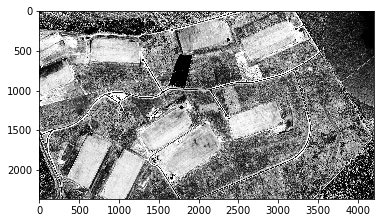

In [8]:
img_ct, img_eq = imageEqualize(img_master)
plt.imshow(img_eq, cmap='gray')
plt.show()

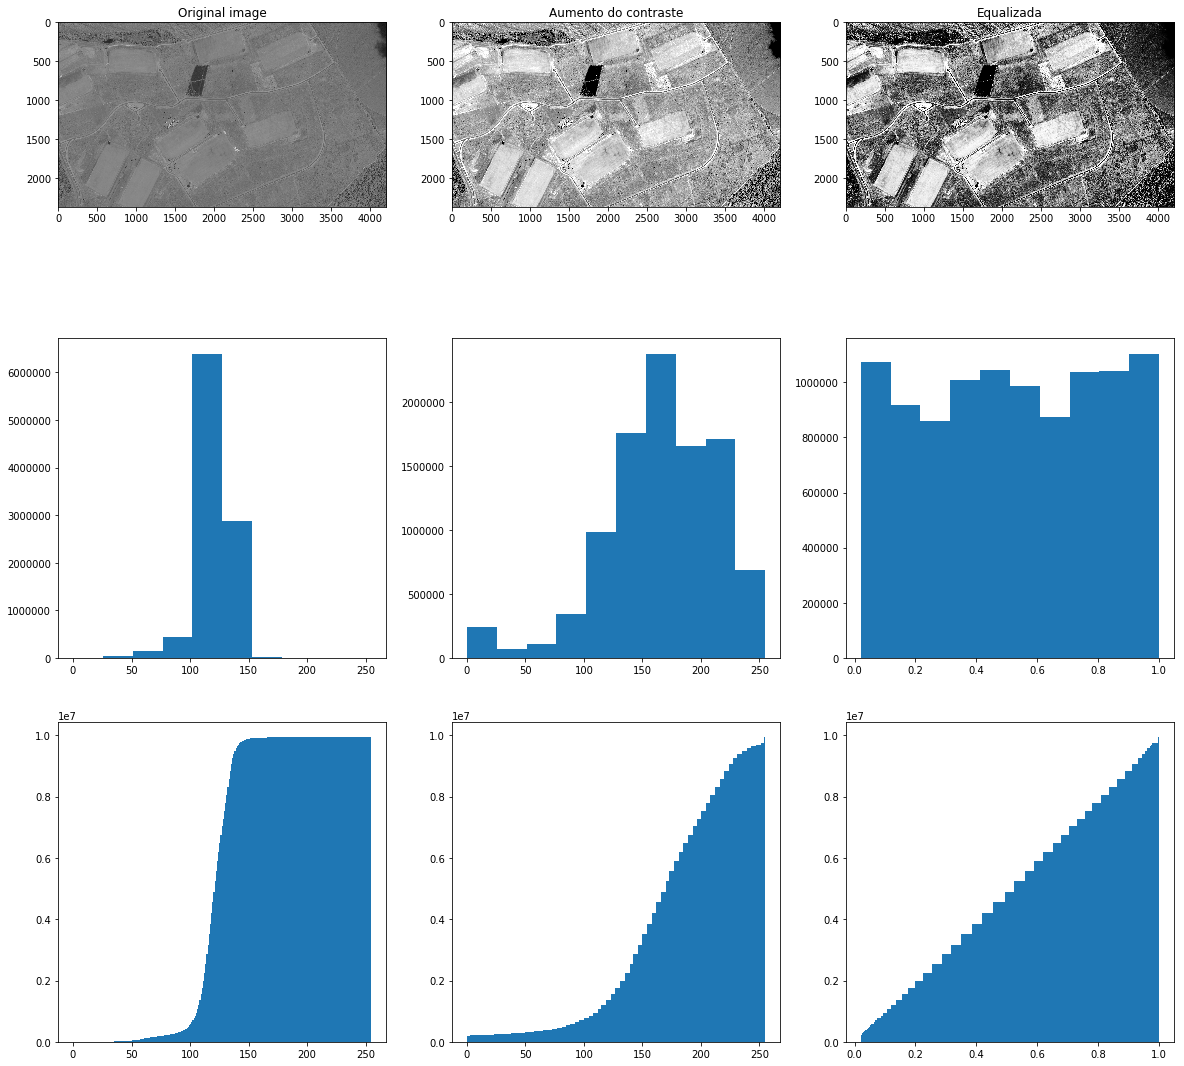

In [9]:
plotEqualize(img_master, img_ct, img_eq)

In [10]:
from skimage import transform as tf
from skimage.feature import CENSURE

def getDescritors(imageOriginnal, imageTransform):
    img_warp = tf.warp(imageOriginnal, imageTransform)
    detector = CENSURE(mode= 'Octagon')
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

    detector.detect(img_master)

    ax[0].imshow(img_master, cmap=plt.cm.gray)
    ax[0].scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
                  0.5 ** detector.scales, facecolors='none', edgecolors='r')
    ax[0].set_title("Original Image")

    detector.detect(img_warp)

    ax[1].imshow(img_warp, cmap=plt.cm.gray)
    ax[1].scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
                  0.5 ** detector.scales, facecolors='none', edgecolors='r')
    ax[1].set_title('Transformed Image')

    for a in ax:
        a.axis('off')

    plt.tight_layout()
    plt.show()

In [11]:
from skimage.feature import ORB, match_descriptors    

def getDescriptors(image):
    orb = ORB(n_keypoints=50)
    orb.detect_and_extract(image)
    keyPoints = orb.keypoints
    descriptors = orb.descriptors
    
def matchORB(imageMaster, imageSlave):
    master.descriptors = getDescriptors(imageMaster)
    slave.descriptors = getDescriptors(imageSlave)
    return match_descriptors(master.descriptors, slave.descriptors, cross_check=True)

def plotMatchesORB(imageMaster, keyPointsMaster, imageSlave, keyPointsSlave, matches):
    fig, ax = plt.subplots(nrows=2, ncols=1)
    plt.gray()
    plot_matches(ax[0], imageMaster, imageSlave, keyPointsMaster, keyPointsSlave, matches)
    ax[0].axis('off')
    ax[0].set_title("Master Image vs. Slave Image")
    plt.show()

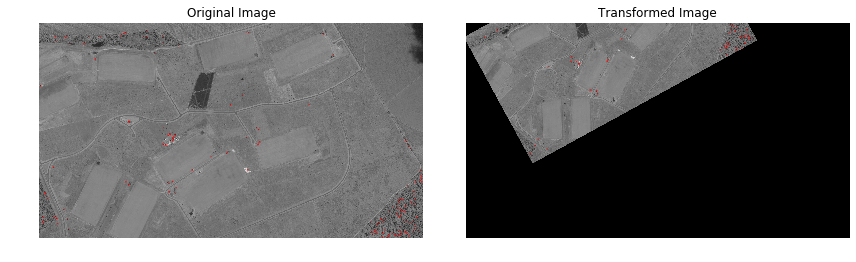

In [12]:
from skimage import data
from skimage import transform as tf
from skimage.feature import CENSURE
from skimage.color import rgb2gray

import matplotlib.pyplot as plt


tform = tf.AffineTransform(scale=(1.5, 1.5), rotation=0.5,
                           translation=(150, -200))
img_warp = tf.warp(img_master, tform)

detector = CENSURE(mode= 'Octagon')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

detector.detect(img_master)

ax[0].imshow(img_master, cmap=plt.cm.gray)
ax[0].scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
              0.5 ** detector.scales, facecolors='none', edgecolors='r')
ax[0].set_title("Original Image")

detector.detect(img_warp)

ax[1].imshow(img_warp, cmap=plt.cm.gray)
ax[1].scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
              0.5 ** detector.scales, facecolors='none', edgecolors='r')
ax[1].set_title('Transformed Image')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

In [20]:
!pip install scikit-image==0.16.2

  Found existing installation: scikit-image 0.14.2
    Uninstalling scikit-image-0.14.2:
      Successfully uninstalled scikit-image-0.14.2


Could not install packages due to an EnvironmentError: [WinError 5] Acesso negado: 'c:\\users\\natal\\anaconda3\\lib\\site-packages\\~kimage\\draw\\_draw.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [21]:
from skimage.util import compare_images

comp_equalized = compare_images(img_eq, img_wv01_2019, method='checkerboard')
diff_rotated = compare_images(img_eq, img_wv01_2019, method='diff')
blend_rotated = compare_images(img_eq, img_wv01_2019, method='blend')

ImportError: cannot import name 'compare_images' from 'skimage.util' (C:\Users\natal\Anaconda3\lib\site-packages\skimage\util\__init__.py)

[]

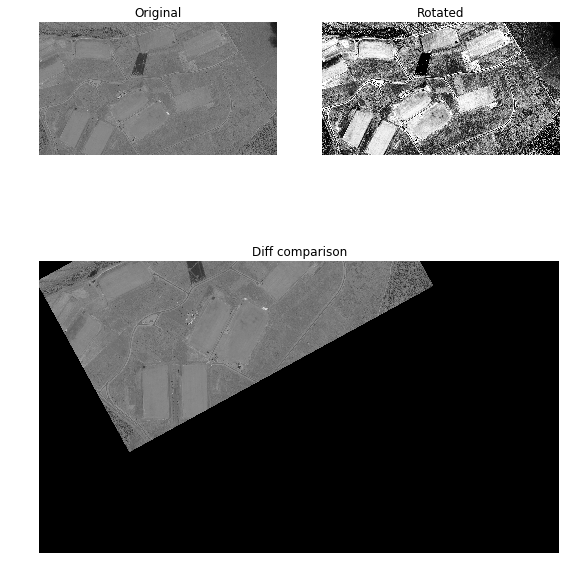

In [16]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(8, 9))

gs = GridSpec(3, 2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1:, :])

ax0.imshow(img_master, cmap='gray')
ax0.set_title('Original')
ax1.imshow(img_warp, cmap='gray')
ax1.set_title('Rotated')
ax2.imshow(diff_rotated, cmap='gray')
ax2.set_title('Diff comparison')
for a in (ax0, ax1, ax2):
    a.axis('off')
plt.tight_layout()
plt.plot()

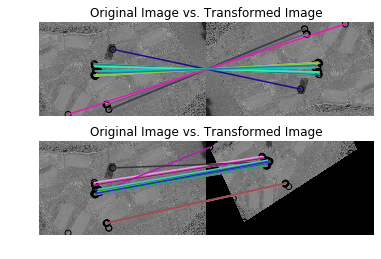

In [13]:
from skimage import data
from skimage import transform as tf
from skimage.feature import (match_descriptors, corner_harris,
                             corner_peaks, ORB, plot_matches)
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

img2 = tf.rotate(img_master, 180)
tform = tf.AffineTransform(scale=(1.3, 1.1), rotation=0.5,
                           translation=(0, -200))
img3 = tf.warp(img_master, tform)

descriptor_extractor = ORB(n_keypoints=50)

descriptor_extractor.detect_and_extract(img_master)
keypoints1 = descriptor_extractor.keypoints
descriptors1 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img2)
keypoints2 = descriptor_extractor.keypoints
descriptors2 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img3)
keypoints3 = descriptor_extractor.keypoints
descriptors3 = descriptor_extractor.descriptors

matches12 = match_descriptors(descriptors1, descriptors2, cross_check=True)
matches13 = match_descriptors(descriptors1, descriptors3, cross_check=True)

fig, ax = plt.subplots(nrows=2, ncols=1)
mask
plt.gray()

plot_matches(ax[0], img_master, img2, keypoints1, keypoints2, matches12)
ax[0].axis('off')
ax[0].set_title("Original Image vs. Transformed Image")

plot_matches(ax[1], img_master, img3, keypoints1, keypoints3, matches13)
ax[1].axis('off')
ax[1].set_title("Original Image vs. Transformed Image")


plt.show()